# Machine learning based prediction MDR gonococcal infections #

by: JEAN-PIERRE GNIMATIN (www.linkedin.com/in/jean-pierre-gnimatin)

### Importing libraries ###

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Importing dataset ###

In [3]:
import pandas as pd

# Defining the file path
file_path = r'/content/data.xlsx'

# Importing the dataset
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,NUM,IDEPISODE,ANNEE,SITE,SEXE,SEXEPART,ORIENTSEX,AGE,AGE_GROUP,REG_CAT,...,ATCHERPG,ATCVPH,ATCTRICHO,ATCITSSAUT,ATCITSSINC,resistant_CIPRO,increased_CEFTRI,increased_CEFI,resistant_AZI,resistant_TETRA
0,495,526,2017,Urogenital,Male,Female,HSM,26,25 to 35,Outside,...,2.0,2.0,2.0,2,2,0,0,0,0,1
1,496,527,2017,Urogenital,Male,Male,BMSM,39,More than 35,Montreal,...,2.0,2.0,2.0,2,2,1,0,0,0,0
2,497,528,2017,Rectal,Male,Male,BMSM,20,Less than 25,Montreal,...,2.0,2.0,2.0,2,2,1,0,0,0,0
3,534,569,2017,Rectal,Male,Male,BMSM,30,25 to 35,Montreal,...,NaN,NaN,NaN,2,2,0,0,0,0,0
4,537,572,2017,Urogenital,Male,Male,BMSM,33,25 to 35,Outside,...,NaN,NaN,NaN,2,2,0,0,0,0,1


### Characteristics of the dataset ###

In [4]:
print("data shape", data.shape)

print("-----------------------------------------")

print("data info", data.info())

print("-----------------------------------------")

print("Dataset description", data.describe())

data shape (775, 59)
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NUM               775 non-null    int64  
 1   IDEPISODE         775 non-null    int64  
 2   ANNEE             775 non-null    int64  
 3   SITE              775 non-null    object 
 4   SEXE              775 non-null    object 
 5   SEXEPART          775 non-null    object 
 6   ORIENTSEX         775 non-null    object 
 7   AGE               775 non-null    int64  
 8   AGE_GROUP         775 non-null    object 
 9   REG_CAT           775 non-null    object 
 10  NBPART_GROUP      775 non-null    object 
 11  PARTEXT           775 non-null    object 
 12  PREVIOUS          775 non-null    object 
 13  PARTEXTVOY        78 non-null     object 
 14  PARTEXTVIS        79 non-null     object 
 15  RECUPOURRS        535 non-nu

### Feature engineering ###

In [14]:
# List of variables to keep
variables_to_keep = ['SITE', 'ORIENTSEX', 'AGE_GROUP', 'REG_CAT', 'NBPART_GROUP', 'PARTEXT', 'PREVIOUS','PARTEXTVIS','RECUPOURRS','DONNEPOURRS','QUINTMAT','MDRstatus']

# Update the dataset by dropping all variables except the ones in the list
data = data[variables_to_keep]


In [15]:
# Encode categorical features
import pandas as pd

data_encoded= pd.get_dummies(data, columns=['SITE', 'ORIENTSEX', 'AGE_GROUP', 'REG_CAT', 'NBPART_GROUP', 'PARTEXT', 'PREVIOUS','PARTEXTVIS','RECUPOURRS','DONNEPOURRS','QUINTMAT'], drop_first=True)

In [16]:
# Def for oversampling train  set using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(data_encoded.drop('MDRstatus', axis=1), data_encoded['MDRstatus'])

In [17]:
#Split dataset into train, validation and testsets
from sklearn.model_selection import train_test_split
X_train,X_temporary, Y_train, Y_temporary= train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temporary, Y_temporary, test_size=0.5, random_state=42)

In [18]:
# Scaling / Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Predictions (Classification Techniques) ###

In [20]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lor_model= LogisticRegression(random_state=42)
lor_model.fit(X_train, Y_train)
lor_pred= lor_model.predict(X_valid)


#Support vector machine
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_valid)


#Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_valid)


#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_valid)


# XGBoost
#from xgboost import XGBClassifier

#xgb_model = XGBClassifier(random_state=42)
#xgb_model.fit(X_train, Y_train)
#xgb_pred = xgb_model.predict(X_valid)


# Gradient Boosting Machine (GBM)
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, Y_train)
gbm_pred = gbm_model.predict(X_valid)


# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_valid)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_valid)


### Evaluations ###

In [21]:
# importing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [25]:
# Evaluate models
models = [lor_model, svm_model, rf_model, dt_model, gbm_model, knn_model, nb_model]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree','GBM', 'KNN', 'Naive Bayes']

for model, name in zip(models, model_names):
    Y_pred = model.predict(X_test)

    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy_score(Y_test, Y_pred))
    print("Precision:", precision_score(Y_test, Y_pred, pos_label='Positif'))
    print("Recall:", recall_score(Y_test, Y_pred, pos_label='Positif'))
    print("F1 Score:", f1_score(Y_test, Y_pred, pos_label='Positif'))
    print("Jaccard Score:", jaccard_score(Y_test, Y_pred, pos_label='Positif'))



Metrics for Logistic Regression:
Accuracy: 0.8235294117647058
Precision: 1.0
Recall: 0.6210526315789474
F1 Score: 0.7662337662337663
Jaccard Score: 0.6210526315789474

Metrics for Support Vector Machine:
Accuracy: 0.7941176470588235
Precision: 1.0
Recall: 0.5578947368421052
F1 Score: 0.7162162162162162
Jaccard Score: 0.5578947368421052

Metrics for Random Forest:
Accuracy: 0.8921568627450981
Precision: 0.8762886597938144
Recall: 0.8947368421052632
F1 Score: 0.8854166666666666
Jaccard Score: 0.794392523364486

Metrics for Decision Tree:
Accuracy: 0.8774509803921569
Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
Jaccard Score: 0.7727272727272727

Metrics for GBM:
Accuracy: 0.8431372549019608
Precision: 0.9436619718309859
Recall: 0.7052631578947368
F1 Score: 0.8072289156626505
Jaccard Score: 0.6767676767676768

Metrics for KNN:
Accuracy: 0.9019607843137255
Precision: 0.9213483146067416
Recall: 0.8631578947368421
F1 Score: 0.891304347826087
Jaccard Score: 0.803921

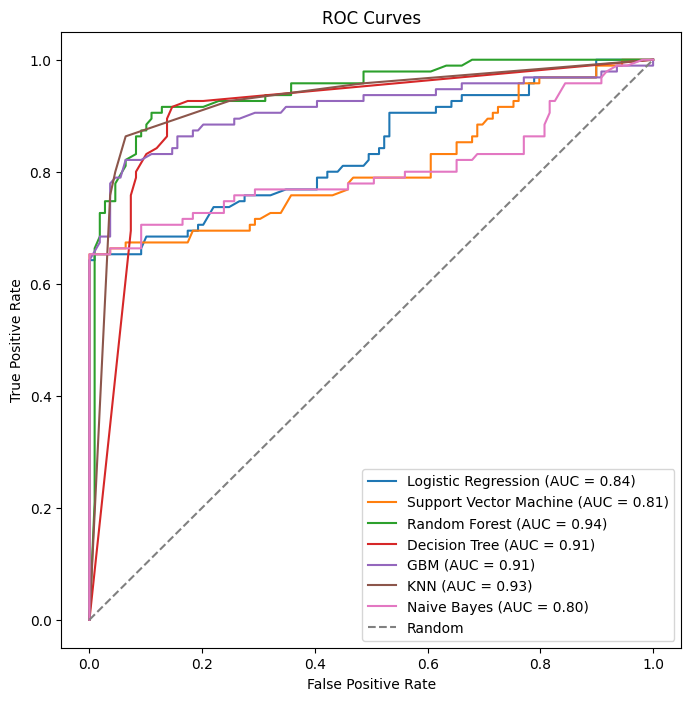

In [26]:
# Function to plot ROC curve
def plot_roc_curve(models, X_test, Y_test, model_names):
    plt.figure(figsize=(8, 8))
    for model, name in zip(models, model_names):
        Y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob, pos_label='Positif')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

# Plot ROC curves
plot_roc_curve(models, X_test, Y_test, model_names)
